In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
df=pd.read_csv('/content/avocado_processed (2).csv')
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,type,year,geography,...,month,season,weekday_name,is_christmas_season,promotion_effect,region,volume_price_interaction,promotion_interaction,month_change,monthly_avg_volume
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.900000,9716.46,conventional,2015,Albany,...,1,Winter,Sunday,0,0.0,Region B,49865.4016,0.0,NaN,199834.61392
1,2015-01-04,1.79,1373.95,57.42,153.88,21629.374703,1162.65,organic,2015,Albany,...,1,Winter,Sunday,0,0.0,Region B,2459.3705,0.0,-0.966385,199834.61392
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.150000,46815.79,conventional,2015,Atlanta,...,1,Winter,Sunday,0,0.0,Region B,435021.4900,0.0,315.621049,199834.61392
3,2015-01-04,1.76,3846.69,1500.15,938.35,21629.374703,1408.19,organic,2015,Atlanta,...,1,Winter,Sunday,0,0.0,Region B,6770.1744,0.0,-0.991157,199834.61392
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.030000,141136.68,conventional,2015,Baltimore/Washington,...,1,Winter,Sunday,0,0.0,Region B,851067.0648,0.0,203.857958,199834.61392


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      30021 non-null  object 
 1   average_price             30021 non-null  float64
 2   total_volume              30021 non-null  float64
 3   4046                      30021 non-null  float64
 4   4225                      30021 non-null  float64
 5   4770                      30021 non-null  float64
 6   total_bags                30021 non-null  float64
 7   type                      30021 non-null  object 
 8   year                      30021 non-null  int64  
 9   geography                 30021 non-null  object 
 10  is_holiday                30021 non-null  int64  
 11  promotion                 30021 non-null  int64  
 12  month                     30021 non-null  int64  
 13  season                    30021 non-null  object 
 14  weekda

In [5]:
df.isnull().sum().value_counts()

,count
0,21
1,1


In [6]:
df['month_change'].fillna(df['month_change'].mean(), inplace=True)

<ipython-input-6-a98b1a5654a4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['month_change'].fillna(df['month_change'].mean(), inplace=True)


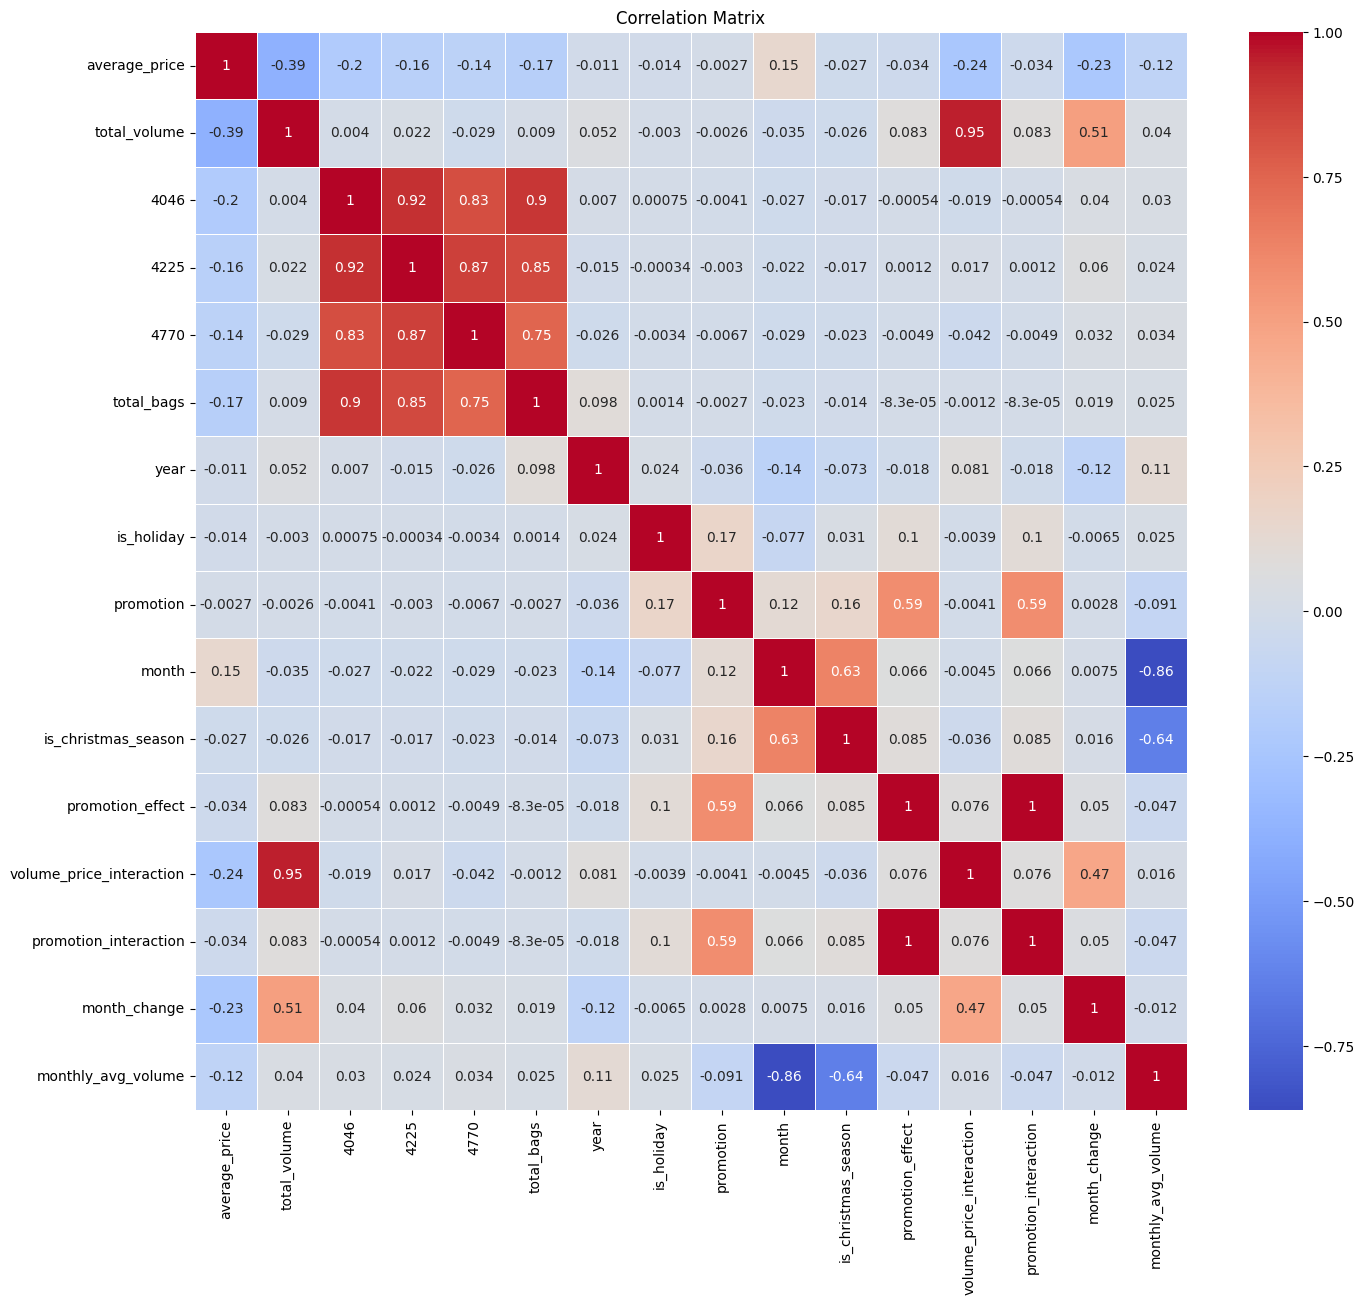

In [7]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-8-024d2b5d7e19>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['total_volume'].resample('M').sum()


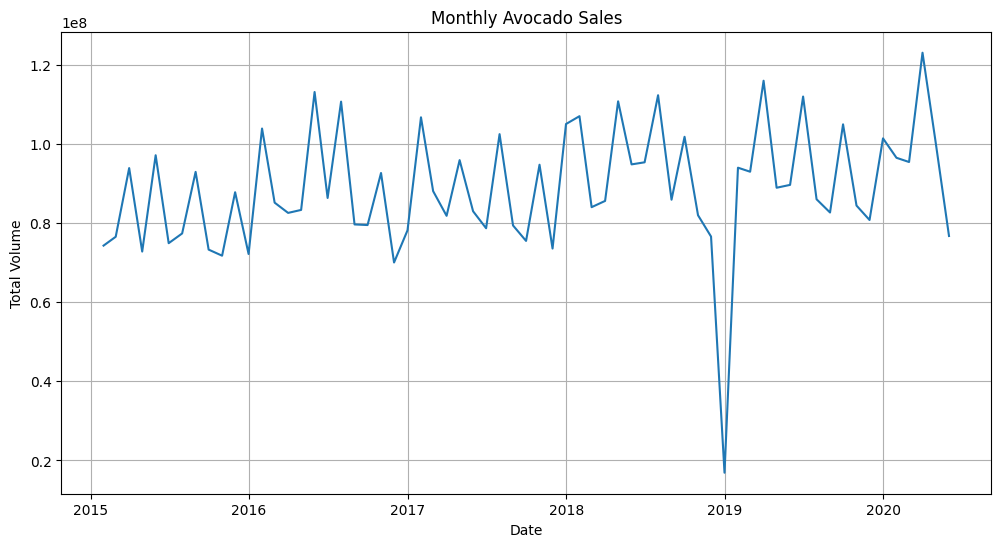

<Figure size 1200x800 with 0 Axes>

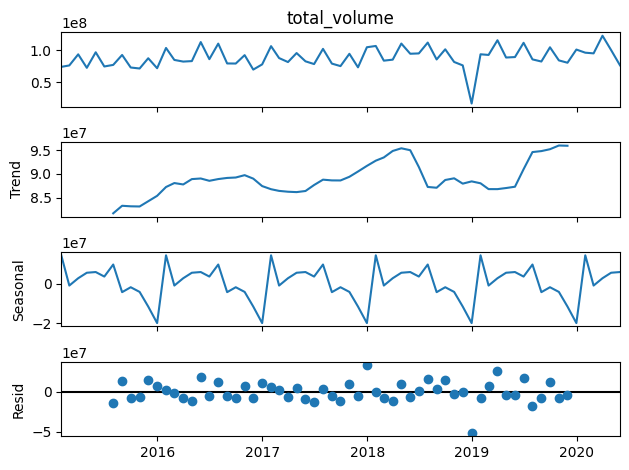

In [8]:
# Set 'Date' as the index.  Convert the 'Date' column to datetime objects first.
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Resample the data to monthly frequency and sum the 'total_volume'
monthly_sales = df['total_volume'].resample('M').sum()

# Plot the monthly sales data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title('Monthly Avocado Sales')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.grid(True)
plt.show()

# Decompose the time series into trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12) # Assuming yearly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


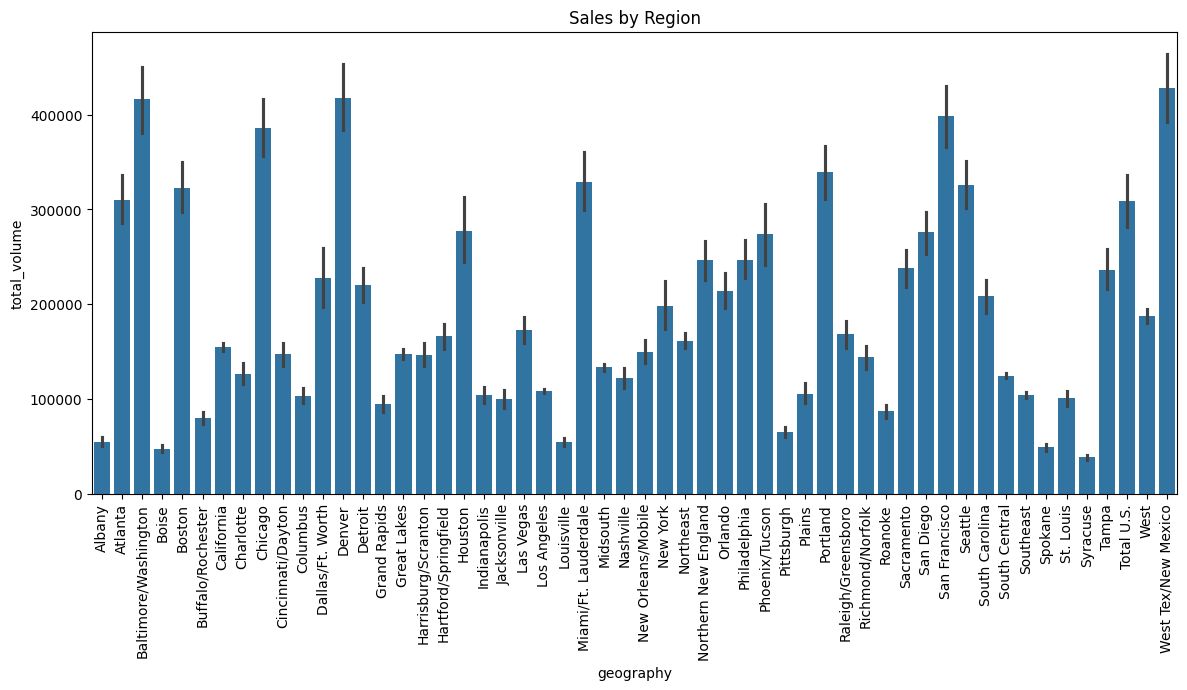

In [10]:
# Bar Chart (Sales by Region)
plt.figure(figsize=(14, 6))
sns.barplot(x=df["geography"], y=df["total_volume"])
plt.title("Sales by Region")
plt.xticks(rotation=90)
plt.show()

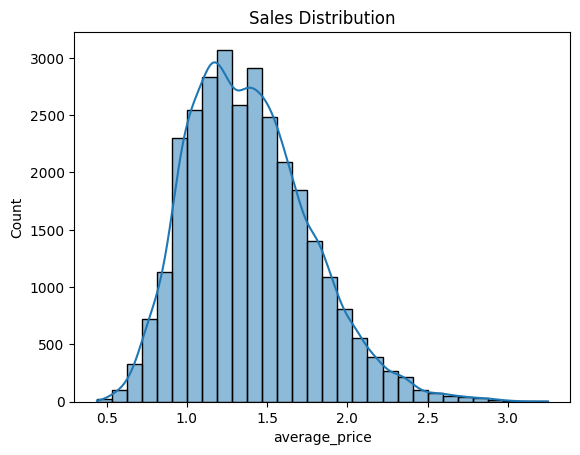

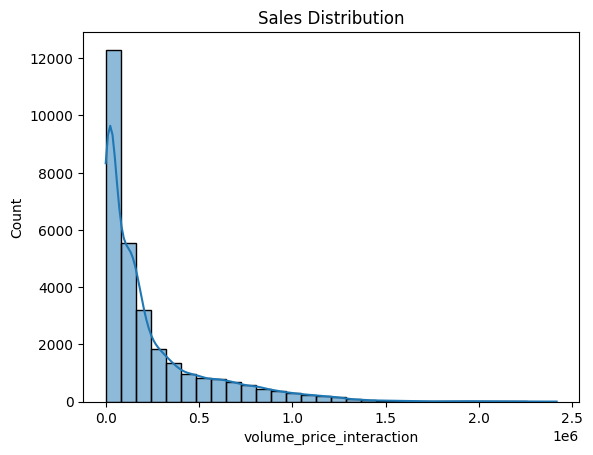

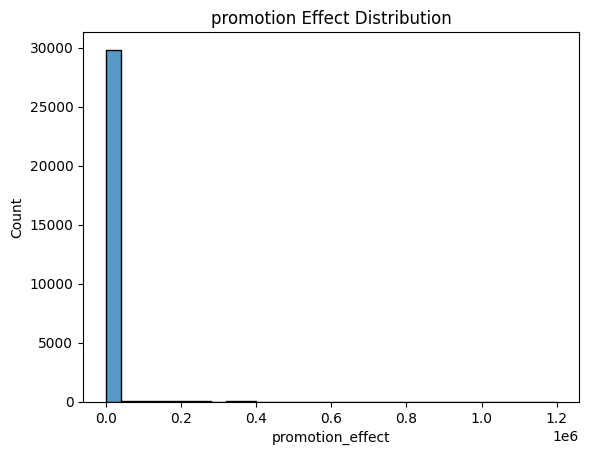

In [13]:
# Histogram
sns.histplot(df["average_price"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()
# Histogram
sns.histplot(df["volume_price_interaction"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

sns.histplot(df["promotion_effect"], bins=30)
plt.title("promotion Effect Distribution")
plt.show()


# Plots For Dashboard

In [44]:

sales_by_region = df.groupby('geography')['total_volume'].sum().reset_index()

fig = px.pie(sales_by_region, values='total_volume', names='geography',
             title='Avocado Sales by Region',
            )
fig.show()


In [33]:
# General Plots for Dashboard

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_sales.index, y=monthly_sales.values,
                         mode='lines', name='Monthly Sales'))

fig.update_layout(title='Monthly Avocado Sales',
                  xaxis_title='Date',
                  yaxis_title='Total Volume')

fig.show()


# Decompose using statsmodels (as before)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Create subplots for decomposition components
fig = make_subplots(rows=4, cols=1, subplot_titles=('Observed', 'Trend', 'Seasonal', 'Residuals'))

# Add traces for observed data
fig.add_trace(go.Scatter(x=monthly_sales.index, y=decomposition.observed, mode='lines', name='Observed'), row=1, col=1)
# Add traces for trend
fig.add_trace(go.Scatter(x=monthly_sales.index, y=decomposition.trend, mode='lines', name='Trend'), row=2, col=1)
# Add traces for seasonal component
fig.add_trace(go.Scatter(x=monthly_sales.index, y=decomposition.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
# Add traces for residuals
fig.add_trace(go.Scatter(x=monthly_sales.index, y=decomposition.resid, mode='lines', name='Residuals'), row=4, col=1)

fig.update_layout(height=800, title_text="Time Series Decomposition")
fig.show()

In [34]:
# General Plots for Dashboard

import plotly.express as px
import pandas as pd

# Scatter plot of sales vs promotions
fig1 = px.scatter(df, x='promotion', y='total_volume', title='Sales vs Promotions',
                 labels={'promotion': 'Promotion (0 = No, 1 = Yes)', 'total_volume': 'Total Volume (Sales)'})

#Sales with and without Promotions
promotion_sales = df.groupby('promotion')['total_volume'].sum().reset_index()
fig2 = px.bar(promotion_sales, x='promotion', y='total_volume', title='Sales with and without Promotions',
              labels={'promotion': 'Promotion', 'total_volume': 'Total Sales'})

#Average Price by Season
season_price = df.groupby('season')['average_price'].mean().reset_index()
fig3 = px.bar(season_price, x='season', y='average_price', title='Average Price by Season',
              labels={'season': 'Season', 'average_price': 'Average Price'})

#Total Sales by Season
season_sales = df.groupby('season')['total_volume'].sum().reset_index()
fig4 = px.bar(season_sales, x='season', y='total_volume', title='Total Sales by Season',
              labels={'season': 'Season', 'total_volume': 'Total Sales'})

promotion_interaction = df.groupby('promotion')['volume_price_interaction'].mean().reset_index()
fig5 = px.bar(promotion_interaction, x='promotion', y='volume_price_interaction', title='Average Volume Price Interaction by Promotion',
              labels={'promotion': 'Promotion', 'volume_price_interaction': 'Average Volume Price Interaction'})
# Display the plots (you can customize layout further)
fig5.show()
fig1.show()
fig2.show()
fig3.show()
fig4.show()





In [35]:
fig=px.scatter(df,x='date',y='volume_price_interaction',color='type')
fig.show()

In [36]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Line(
    x=df.date,
    y=df['total_volume'],
    name="Sales"
))
fig.add_trace(go.Line(
    x=df.date,
    y=df['promotion'] * df['total_volume'].max(),
    name="promotion"
))
fig.update_layout(
    title="Sales and Promotions over Time",title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Sales Volume"
)
fig.show()


/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [38]:
dff_Ctry=df[df["geography"]=='Albany']      # Filter Countries
dff_temp_year=dff_Ctry[dff_Ctry["year"]==2015]        # filter Year Also selected by user
dff_temp_year=dff_temp_year.sort_values(by='month')
fig = px.bar(dff_temp_year,x='month', y="monthly_avg_volume")

fig.show()
#  Notes : in dashboard Application
# Note #1: to filter Countries,we will replace Albany with Country selected by user.
# Note #2: to filter Year,we will replace year(2015) with year selected by user.


In [39]:
fig = px.line(dff_temp_year,x='month', y="month_change")
fig.show()

#Note :
# visualizing how the month_change value (probably a measure of sales change) varies over the months
# within the filtered data from the dff_temp_year dataset



In [41]:
fig = px.bar(dff_Ctry,x='year', y="total_volume")
fig.show()
# show how the total avocado sales volume in Albany has changed over the years.

In [42]:
fig=px.pie(dff_Ctry,values='total_volume',names='weekday_name')
fig.show()

#shows the distribution of total avocado sales volume (total_volume) in Albany for different weekdays ('weekday_name')